# Looking at your data

The goal of the dataset is to faithfully and completely capture the parent distribution, or what the data will look like in the wild when the model is used. So how much data is needed to capture parent distribution ? and how many features should the dataset have ? Here is the good thumb rule: A feature vector should contain only features that captures the aspects of the data that allow the model to generalize to new data. In other words, features should capture aspects of the data that help the model separate the classes. We need enough features to capture all the relevant parts of the data so that the model has something to learn from, but if we have too many features, we fall victim to the the curse of dimensionality.

Curse of dimensionality: Generally, A D dimensional space feature vector (D= length of the vector) would need about $10^D$ data points to represent that space "well". So, 2D feature sapce would need 100 data points, 3D = 1000, 4D = 10,000 etc. 

Dataset can be summarized by mean, median, std.dev, min and max value and std.error. Std.error is also known as standard error of the mean $\bar{x}$. This is the stf.dev divided by the square root of the number of the elements in the dataset. The std. error is a measure of the difference between dataset mean value $\bar{x}$ and the mean value of the parent distribution. Idea is that if we have more data, we'll have better idea of the parent distribution that is generating this data, and so the mean value of the dataset will be closer to the mean value of the parent distribution. 

In [11]:
import numpy as np

f = [0.3408,3.0150,4.3465,2.1271,2.7561,
     2.7887,4.8231,0.0705,3.9897,0.9804,
     2.3944,2.0085,1.7821,1.5362,2.3190]
f = np.array(f)

print
print("mean  = %0.4f" % f.mean())
print("std   = %0.4f" % f.std())
print("SE    = %0.4f" % (f.std()/np.sqrt(f.shape[0])))
print("median= %0.4f" % np.median(f))
print("min   = %0.4f" % f.min())
print("max   = %0.4f" % f.max())

mean  = 2.3519
std   = 1.3128
SE    = 0.3390
median= 2.3190
min   = 0.0705
max   = 4.8231


# Building datasets

## Iris



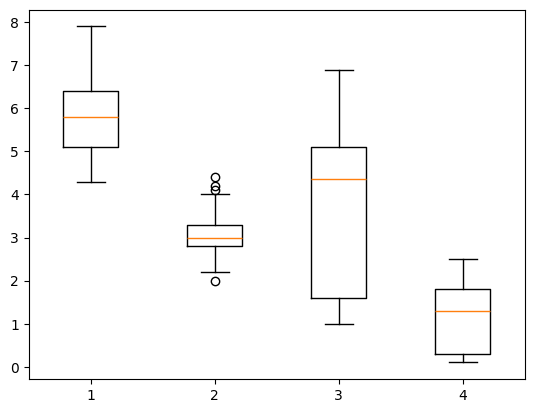

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

with open("./data/iris/iris.data") as f:
    lines = [i[:-1]for i in f.readlines()]
n = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
# print(n.index("Iris-virginica"))
# x = lables
x = [n.index(i.split(",")[-1]) for i in lines if i != ""]
x = np.array(x, dtype="uint8")
# print(x.shape)
# y = features
y = [[float(j) for j in i.split(",")[:-1]] for i in lines if i != ""]
y = np.array(y)
# print(y.shape)
idx = np.argsort(np.random.random(x.shape[0]))
x = x[idx]
y = y[idx]
np.save("./data/iris/iris_features", y)
np.save("./data/iris/iris_labels", x)
plt.boxplot(y)
plt.show()



## Breast Cancer

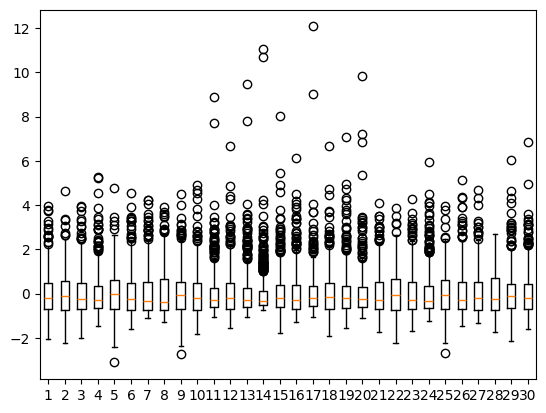

In [17]:
import numpy as np 
import matplotlib.pyplot as plt


with open("./data/breast_cancer/wdbc.data") as f :
    lines = [i[:-1] for i in f.readlines() if i!= ""]

n = ["B", "M"]
x = [n.index(i.split(",")[1]) for i in lines]
x = np.array(x, dtype="uint8")
y = [[float(j) for j in i.split(",")[2:]] for i in lines]
y = np.array(y)


# Randomize
idx = np.argsort(np.random.random(x.shape[0]))
x = x[idx]
y = y[idx]
y_normalized = (y - y.mean(axis=0))/ y.std(axis=0)

np.save("./data/breast_cancer/bc_features.npy", y)
np.save("./data/breast_cancer/bc_features_normalized.npy", y_normalized)
np.save("./data/breast_cancer/bc_labels.npy", x)
plt.boxplot(y_normalized)
plt.show()



## MNIST Digits

In [14]:
import numpy as np 
import keras
from keras.datasets import mnist

(xtrn, ytrn), (xtst, ytst) = mnist.load_data()
# print(f"xtrn shape: {xtrn.shape}")
# print(f"ytrn shape: {ytrn.shape}")
# print(f"xtst shape: {xtst.shape}")
# print(f"ytst shape: {ytst.shape}")
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]
np.save("./data/mnist/mnist_train_images.npy", xtrn)
np.save("./data/mnist/mnist_train_lables.npy", ytrn)
np.save("./data/mnist/mnist_test_images.npy", xtst)
np.save("./data/mnist/mnist_test_lables.npy", ytst)

# store images as vectors

xtrn_v = xtrn.reshape((60000, 28*28))
xtst_v = xtst.reshape((10000, 28*28))
np.save("./data/mnist/mnist_train_vectors.npy", xtrn_v)
np.save("./data/mnist/mnist_test_vectors.npy", xtst_v)

# srcamble the just created vectors (jumble up)

idx = np.argsort(np.random.random(28*28))
for i in range(60000):
    xtrn_v[i, :] = xtrn_v[i, idx]
for j in range(10000):
    xtst_v[j, :] = xtst_v[j, idx]

np.save("./data/mnist/mnist_train_scrambled_vectors.npy", xtrn_v)
np.save("./data/mnist/mnist_test_scrambled_vectors.npy", xtst_v)

# make images with scrambled vectors

temp =  np.zeros((60000, 28, 28))
for i in range(60000):
    temp[i, :, :] = xtrn_v[i, :].reshape((28, 28))

np.save("./data/mnist/mnist_train_scrambled_images.npy", temp)

temp =  np.zeros((10000, 28, 28))
for i in range(10000):
    temp[i, :, :] = xtst_v[i, :].reshape((28, 28))

np.save("./data/mnist/mnist_test_scrambled_images.npy", temp)


## CIFAR-10

In [15]:
import numpy as np
import keras
from keras.datasets import cifar10

(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]
np.save("./data/cifar10/cifar10_train_images.npy", xtrn)
np.save("./data/cifar10/cifar10_train_lables.npy", ytrn)
np.save("./data/cifar10/cifar10_test_images.npy", xtst)
np.save("./data/cifar10/cifar10_test_lables.npy", ytst)

# store images as vectors

xtrn_v = xtrn.reshape((50000, 32*32*3)) # color images
xtst_v = xtst.reshape((10000, 32*32*3)) # color images
np.save("./data/cifar10/cifar10_train_vectors.npy", xtrn_v)
np.save("./data/cifar10/cifar10_test_vectors.npy", xtst_v)